## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Mice_Merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
Mice_Merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [2]:
# Checking the number of mice.
Mice = len(Mice_Merged_df["Mouse ID"].unique())
Mice

249

In [3]:
drop_dup_mouse = Mice_Merged_df.loc[Mice_Merged_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
drop_dup_mouse

array(['g989'], dtype=object)

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [5]:
# Optional: Get all the data for the duplicate mouse ID.

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Cleaned_Up_df = Mice_Merged_df[Mice_Merged_df['Mouse ID'].isin(drop_dup_mouse)==False]
Cleaned_Up_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
MouseCheck = len(Cleaned_Up_df["Mouse ID"].unique())
MouseCheck

248

In [8]:
Unique_mice = Cleaned_Up_df.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'],keep='first')
mice_per_treatment = Unique_mice[["Drug Regimen", "Mouse ID"]]
mice_per_treatment
mice_per_treatment_count = mice_per_treatment.groupby("Drug Regimen").count()["Mouse ID"]
mice_per_treatment_count

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Grpd_Clean_df = Cleaned_Up_df.groupby(["Drug Regimen"])
TumorMean = round(Grpd_Clean_df['Tumor Volume (mm3)'].mean(), 3)
TumorMedian = round(Grpd_Clean_df['Tumor Volume (mm3)'].median(), 3)
TumorVar = round(Grpd_Clean_df['Tumor Volume (mm3)'].var(), 3)
TumorSTD = round(Grpd_Clean_df['Tumor Volume (mm3)'].std(), 3)
TumorSem = round(Grpd_Clean_df['Tumor Volume (mm3)'].sem(), 3)
MouseCnt = mice_per_treatment_count

In [11]:
SumStatDrug = pd.DataFrame({"Mouse Count" : mice_per_treatment_count,
                            "Mean of Tumor Volume": TumorMean,
                            "Median of Tumor Volume": TumorMedian,
                                "Variance of Tumor Volume" : TumorVar,
                                "Standard Deviation of Tumor Volume" : TumorSTD,
                                "SEM of Tumor Volume" : TumorSem})
SumStatDrug

,Mouse Count,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,,
Capomulin,25,40.676,41.558,24.948,4.995,0.329
Ceftamin,25,52.591,51.776,39.290,6.268,0.470
Infubinol,25,52.885,51.821,43.129,6.567,0.492
Ketapril,25,55.236,53.699,68.554,8.280,0.604
Naftisol,25,54.332,52.509,66.173,8.135,0.596
Placebo,25,54.034,52.289,61.168,7.821,0.581
Propriva,24,52.321,50.446,43.852,6.622,0.544
Ramicane,25,40.217,40.673,23.487,4.846,0.321
Stelasyn,24,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

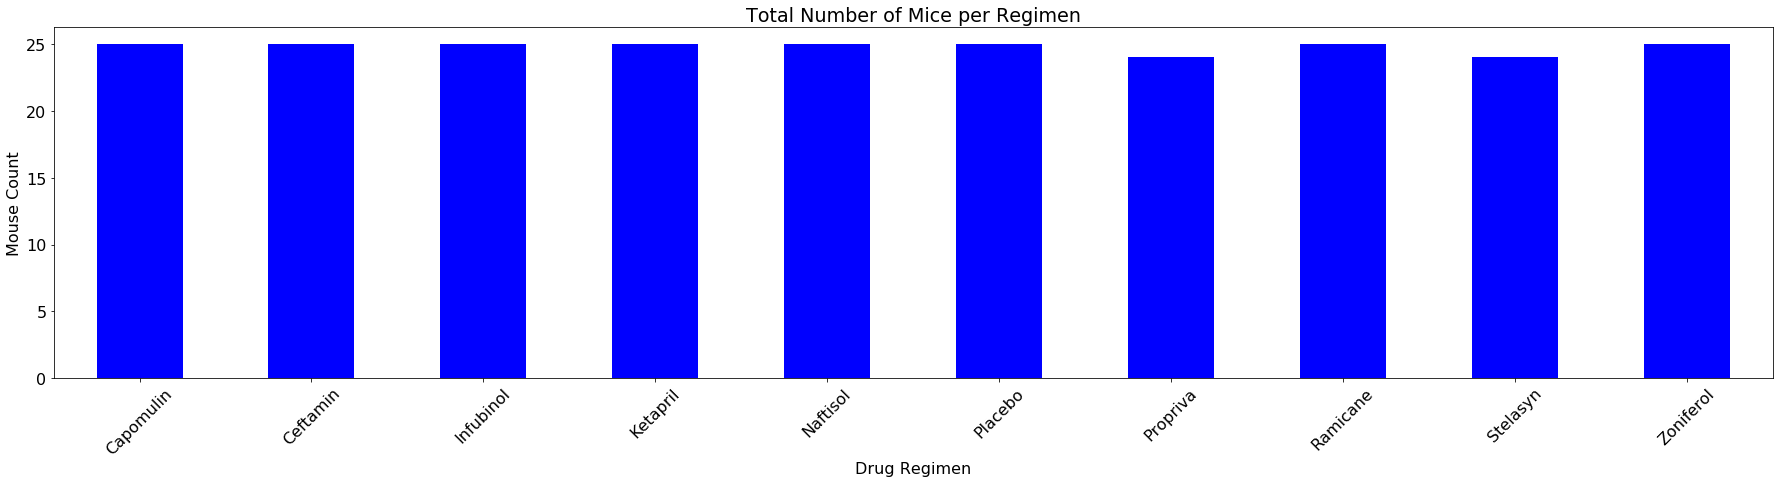

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Grpd_Clean_Count = pd.DataFrame(mice_per_treatment_count)
Drug_Regimen_Bar= Grpd_Clean_Count.plot(kind = 'bar', title="Total Number of Mice per Regimen", color="blue", rot=45, legend=False)
Drug_Regimen_Bar.set_ylabel("Mouse Count")
plt.tight_layout()
plt.savefig("Charts/TotalMicePerRegimenPandasBar.png")

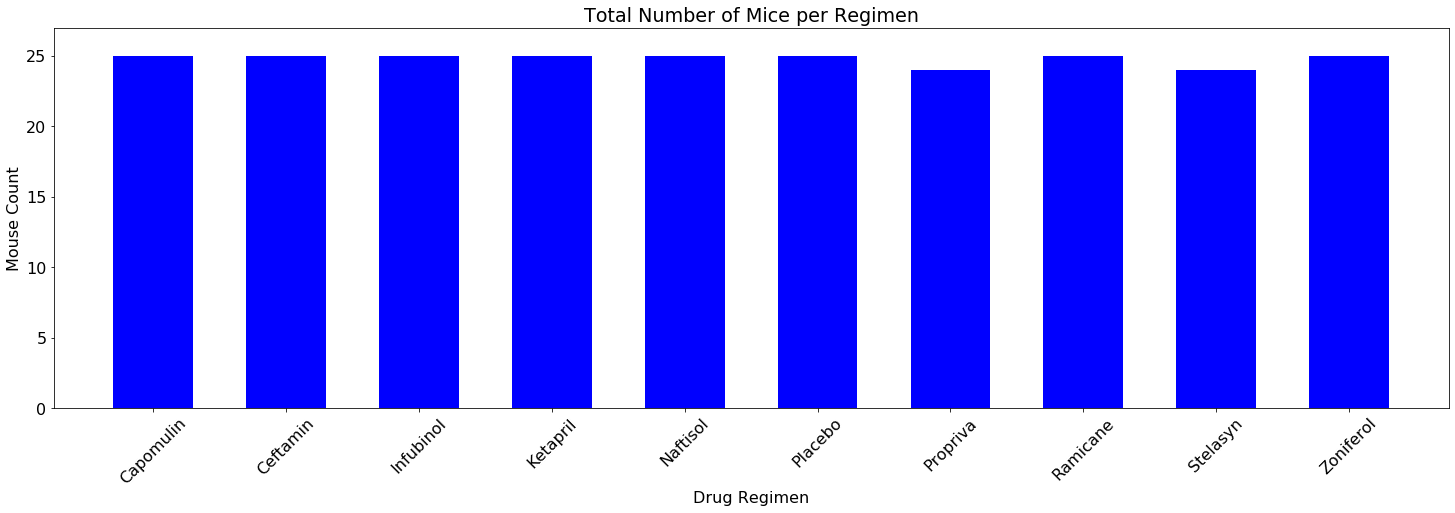

In [36]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_per_treatment_count))
Mice = MouseCnt
plt.bar(x_axis, Mice, width=0.60, color='b', alpha=1, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(Grpd_Clean_Count.index), rotation=45)
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(mice_per_treatment_count)+2)
plt.title("Total Number of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.savefig("Charts/TotalMicePerRegimenPyPlotBar.png")
# plt.legend(handles= [x_axis], loc="best")
#make Legend mpatches

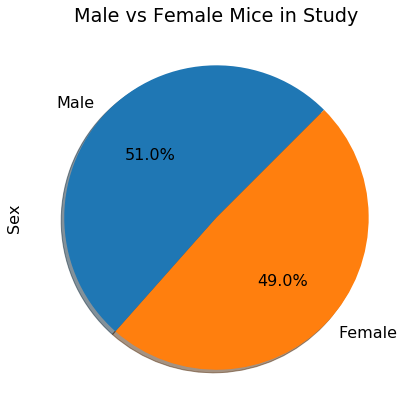

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Sex_Compare = Cleaned_Up_df["Sex"].value_counts()
Sex_CompareChrt = Sex_Compare.plot(kind = 'pie', title="Male vs Female Mice in Study", autopct='%1.1f%%',\
                                   shadow=True, startangle=45, fontsize=16) 
plt.savefig("Charts/MaleVsFemaleMicePandasPie.png")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
MiceCompare_df = Cleaned_Up_df.groupby(["Sex"]).count()
Labels = MiceCompare_df.index
Colors = ["darkorange", "royalblue"]

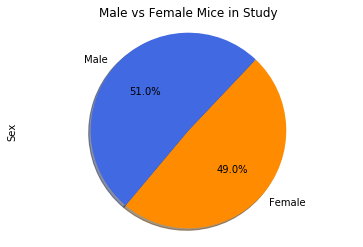

In [16]:
MiceComparePie = plt.pie(MiceCompare_df['Mouse ID'], labels= Labels, colors=Colors,\
                         autopct="%1.1f%%", shadow=True, startangle=230)
plt.title('Male vs Female Mice in Study')
plt.ylabel("Sex")
plt.axis("equal")
plt.rcParams['font.size'] = 16
plt.savefig("Charts/MaleVsFemaleMicePyPlotPie.png")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
Drug_segment = Cleaned_Up_df[Cleaned_Up_df['Drug Regimen'].isin(Drugs)==True]

# Start by getting the last (greatest) timepoint for each mouse

Drugs_grpd = pd.DataFrame(Drug_segment.groupby('Mouse ID').max()["Timepoint"])

Merged_df = pd.merge(Drug_segment, Drugs_grpd, on=("Mouse ID", "Timepoint"))
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [18]:
Merged_Grouped = Merged_df.groupby(['Drug Regimen','Mouse ID']).agg\
(Final_Tumor_Size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)
Merged_Grouped

Final_Tumor_Size
Drug Regimen Mouse ID                  
Capomulin    b128                38.983
             b742                38.940
             f966                30.486
             g288                37.074
             g316                40.159
...                                 ...
Ramicane     s508                30.276
             u196                40.668
             w678                43.166
             y449                44.183
             z578                30.639

[100 rows x 1 columns]

In [19]:
Merged_Grouped_Regrouped = Merged_Grouped.stack(level=0).unstack(level=0)
Merged_Grouped_Regrouped

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Final_Tumor_Size,NaN,NaN,67.973,NaN
a251,Final_Tumor_Size,NaN,NaN,65.526,NaN
a275,Final_Tumor_Size,NaN,62.999,NaN,NaN
a411,Final_Tumor_Size,NaN,NaN,NaN,38.408
a444,Final_Tumor_Size,NaN,NaN,NaN,43.048
...,...,...,...,...,...
y769,Final_Tumor_Size,NaN,68.595,NaN,NaN
y793,Final_Tumor_Size,31.896,NaN,NaN,NaN
y865,Final_Tumor_Size,NaN,64.730,NaN,NaN


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

counter = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Drugs:
    quartiles = Merged_Grouped_Regrouped[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round(upperq-lowerq, 2)
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug}")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


--------------------------------------------------------
Capomulin
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could 

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Vol = []
for drug in Drugs:
    Tumor_Vol.append(list(Merged_Grouped_Regrouped[drug].dropna()))

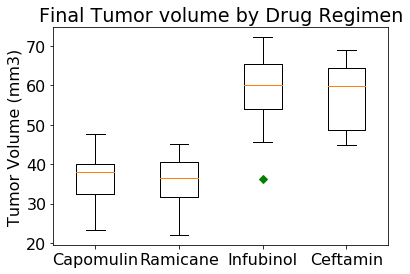

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(Tumor_Vol, notch=0, sym='gD')
plt.xticks([1,2,3,4],Drugs)
plt.savefig("Charts/TumorVolumeByRegimen.png")
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_data = Cleaned_Up_df.loc[Cleaned_Up_df['Drug Regimen'] == 'Capomulin']

Capomulin_mouse = Capomulin_data[Capomulin_data["Mouse ID"] == "y793"]
Capomulin_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2


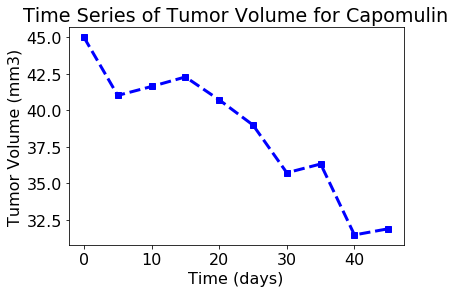

In [24]:
x_axis = Capomulin_mouse['Timepoint']
y_axis = Capomulin_mouse['Tumor Volume (mm3)']
plt.errorbar(x_axis, y_axis, fmt="bs--", linewidth=3)
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.rcParams["figure.figsize"] = [25,7]
plt.savefig("Charts/TumorVsTime.png")
plt.show()

In [25]:
Capomulin_grpd = Capomulin_data.groupby(['Mouse ID']).agg(\
        Mouse_weight=('Weight (g)', np.mean),\
        Tumor_vol=('Tumor Volume (mm3)', np.mean)\
).round(3)
Capomulin_grpd.head()

,Mouse_weight,Tumor_vol
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613


In [26]:
x_value = Capomulin_grpd['Mouse_weight']
y_value = Capomulin_grpd['Tumor_vol']

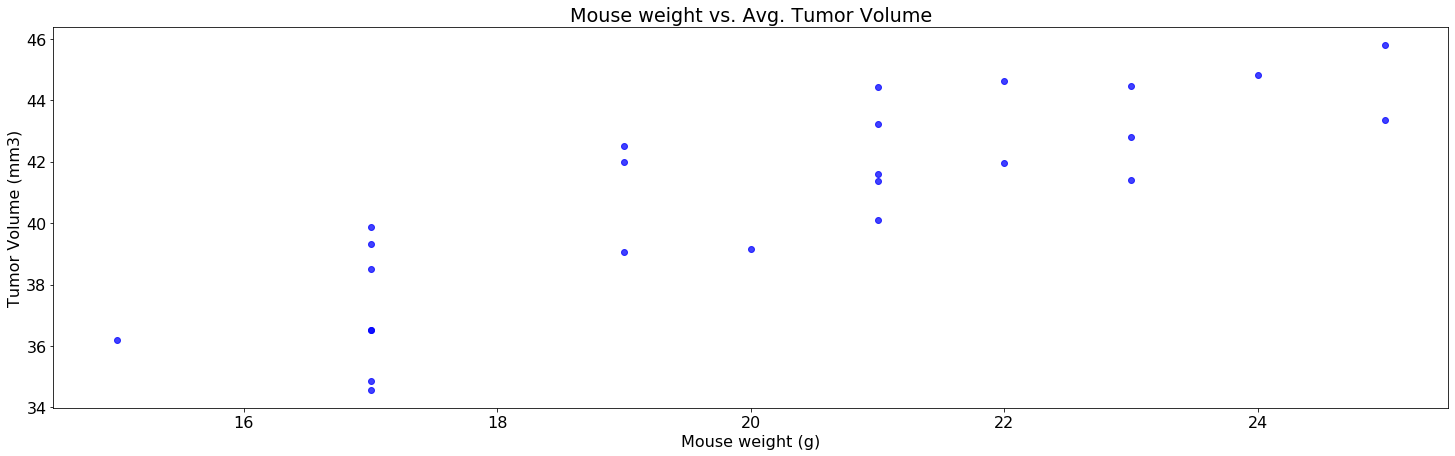

In [27]:
plt.scatter(x_value, y_value, marker='o', facecolors='blue', alpha=.75)


plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Charts/WeightVsTumorVol.png")
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_grpd['Mouse_weight'],Capomulin_grpd['Tumor_vol'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


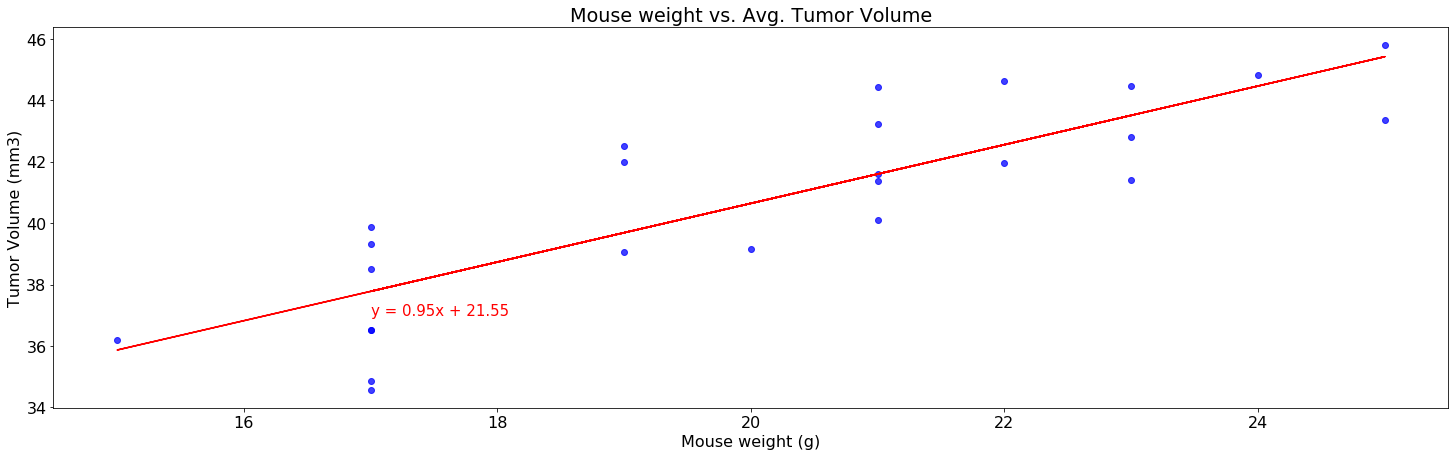

In [29]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value, y_value, marker='o', facecolors='blue', alpha=.75)
plt.plot(x_value, regress_values, 'r-')
plt.annotate(line_eq,(17,37),fontsize=15,color="red")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Charts/WeightVsTumorVolRegression.png")
plt.show()